<a href="https://colab.research.google.com/github/whistle-hikhi/K-nearest-neighbors/blob/main/knn_brute_force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Apr  1 05:33:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
%load_ext cuml.accel

[2025-04-01 05:34:02.013] [CUML] [info] cuML: Installed accelerator for sklearn.
[2025-04-01 05:34:34.291] [CUML] [info] cuML: Installed accelerator for umap.
[2025-04-01 05:34:34.400] [CUML] [info] cuML: Installed accelerator for hdbscan.
[2025-04-01 05:34:34.400] [CUML] [info] cuML: Successfully initialized accelerator.


In [3]:
import numpy as np
from collections import Counter

In [4]:
class BruteForecKNN:
  def __init__(self, k=3):
    self.k = k
    self.X_train = None
    self.y_train = None

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def euclidean_distance(self, x1, x2):
    return np.sqrt(np.sum(x1 - x2) ** 2)

  def predict(self, X_test):
    predictions = []

    for x_test in X_test:
      distances = []
      for i, x_train in enumerate(self.X_train):
        dist = self.euclidean_distance(x_test, x_train)
        distances.append((dist, self.y_train[i]))

      distances.sort(key=lambda x: x[0])
      k_nearest = distances[:self.k]

      prediction = np.mean([y for _, y in k_nearest])
      predictions.append(prediction)

    return np.array(predictions)


In [5]:
np.random.seed(16)

X_train = np.array([
    [1, 2],
    [2, 3],
    [3, 1],
    [6, 5],
    [7, 9],
    [3, 6]])

y_train  = np.array([1.5, 2.0, 1.8, 4.2, 8.2, 1.2])


X_test = np.array(
    [
        [4, 3],
        [5, 7]
  ]
)

In [6]:
knn = BruteForecKNN(k=3)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

In [7]:
print("Test points", X_test)
print("Preditions", predictions)

Test points [[4 3]
 [5 7]]
Preditions [1.66666667 4.53333333]


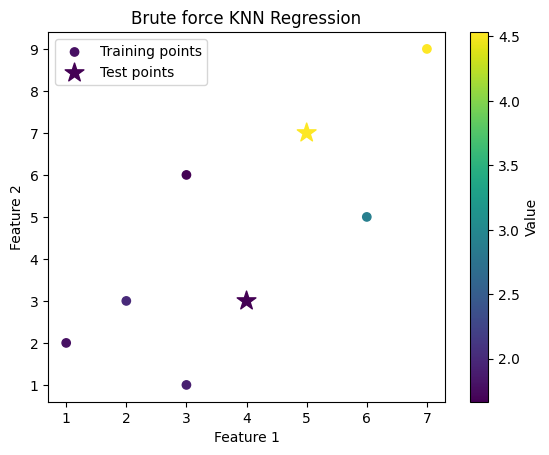

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training points')
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis', marker='*', s=200, label='Test points')

plt.colorbar(label='Value')
plt.legend()
plt.title('Brute force KNN Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
